In [1]:
# Import all the things

import json
import pandas as pd
import numpy as np
import wrangle
import acquire
from prepare import basic_clean, tokenize, lemmatize, stem, remove_stopwords, split_data, prep_string_data

import re
from sklearn.feature_extraction.text import TfidfVectorizer

from wordcloud import WordCloud
from matplotlib import pyplot as plt
import seaborn as sns

import nltk

from scipy import stats

import warnings
warnings.filterwarnings("ignore")

In [2]:
df = wrangle.get_npr_data()
df.head()

The df has 2998347 rows and 10 columns.


,episode_order,speaker,utterance,program,title,is_host,clean,lemmatized_stopped,vader_stopped,date
episode_id,,,,,,,,,,
57264,9,"Ms. LOREN MOONEY (Editor-in-Chief, Bicycling M...","It's a 2,200-mile race. To give some sense of ...",Talk of the Nation,How To Watch The Tour De France,False,it s a 2200 mile race. to give some sense of p...,2200 mile race. give sense perspective roughly...,0.0000,2010-07-12
57264,10,"Ms. LOREN MOONEY (Editor-in-Chief, Bicycling M...",So for a top competitor like Lance to try to m...,Talk of the Nation,How To Watch The Tour De France,False,so for a top competitor like lance to try to m...,top competitor like lance try make much time 1...,0.9313,2010-07-12
57264,11,"NEAL CONAN, host","So in every team, presumably there's one star,...",Talk of the Nation,How To Watch The Tour De France,True,so in every team presumably there s one star o...,every team presumably one star one equivalent ...,0.7096,2010-07-12
57264,12,"Ms. LOREN MOONEY (Editor-in-Chief, Bicycling M...",That's right. Each team has nine riders. And w...,Talk of the Nation,How To Watch The Tour De France,False,that s right. each team has nine riders. and w...,right. team ha nine riders. basically team lea...,0.9274,2010-07-12
57264,13,"NEAL CONAN, host","So slipstream, this is like drafting in car ra...",Talk of the Nation,How To Watch The Tour De France,True,so slipstream this is like drafting in car rac...,slipstream like drafting car racing right ?,0.3612,2010-07-12


## Is there a difference in the mean sentiment by speaker? Program? etc
- Applied statistics-> i.e. stats testing. Is there a difference in the mean sentiment by speaker? Program? etc 

In [3]:
df.columns

Index(['episode_order', 'speaker', 'utterance', 'program', 'title', 'is_host',
       'clean', 'lemmatized_stopped', 'vader_stopped', 'date'],
      dtype='object')

In [4]:
df.shape

(2998347, 10)

In [5]:
df.dtypes

episode_order           int64
speaker                object
utterance              object
program                object
title                  object
is_host                  bool
clean                  object
lemmatized_stopped     object
vader_stopped         float64
date                   object
dtype: object

In [9]:
df.date = pd.to_datetime(df.date)

In [10]:
df.dtypes

episode_order                  int64
speaker                       object
utterance                     object
program                       object
title                         object
is_host                         bool
clean                         object
lemmatized_stopped            object
vader_stopped                float64
date                  datetime64[ns]
dtype: object

In [12]:
df.index.value_counts()

35108    512
73336    475
57481    459
19633    453
77896    419
        ... 
85857      1
54086      1
77677      1
7000       1
31142      1
Name: episode_id, Length: 104896, dtype: int64

In [14]:
df.groupby(by=df.index).vader_stopped.mean()

episode_id
1         0.266400
2         0.352819
3        -0.219529
4         0.059670
5         0.216645
            ...   
140746    0.265561
140747    0.068450
140748    0.330058
140749    0.163007
141179    0.422604
Name: vader_stopped, Length: 104896, dtype: float64

In [ ]:

# df['Date'].dt.strftime('%b-%Y')

# df['episode_date'].dt.strftime('%b')

In [15]:
df['month']=df['date'].dt.strftime('%b')
df['year']=pd.DatetimeIndex(df['date']).year
df.head()


,episode_order,speaker,utterance,program,title,is_host,clean,lemmatized_stopped,vader_stopped,date,month,year
episode_id,,,,,,,,,,,,
57264,9,"Ms. LOREN MOONEY (Editor-in-Chief, Bicycling M...","It's a 2,200-mile race. To give some sense of ...",Talk of the Nation,How To Watch The Tour De France,False,it s a 2200 mile race. to give some sense of p...,2200 mile race. give sense perspective roughly...,0.0000,2010-07-12,Jul,2010
57264,10,"Ms. LOREN MOONEY (Editor-in-Chief, Bicycling M...",So for a top competitor like Lance to try to m...,Talk of the Nation,How To Watch The Tour De France,False,so for a top competitor like lance to try to m...,top competitor like lance try make much time 1...,0.9313,2010-07-12,Jul,2010
57264,11,"NEAL CONAN, host","So in every team, presumably there's one star,...",Talk of the Nation,How To Watch The Tour De France,True,so in every team presumably there s one star o...,every team presumably one star one equivalent ...,0.7096,2010-07-12,Jul,2010
57264,12,"Ms. LOREN MOONEY (Editor-in-Chief, Bicycling M...",That's right. Each team has nine riders. And w...,Talk of the Nation,How To Watch The Tour De France,False,that s right. each team has nine riders. and w...,right. team ha nine riders. basically team lea...,0.9274,2010-07-12,Jul,2010
57264,13,"NEAL CONAN, host","So slipstream, this is like drafting in car ra...",Talk of the Nation,How To Watch The Tour De France,True,so slipstream this is like drafting in car rac...,slipstream like drafting car racing right ?,0.3612,2010-07-12,Jul,2010


In [16]:
import matplotlib.pyplot as plt
import seaborn as sns

### Looking to do a lineplot of mean sentiment by day (or maybe resampled by month or whatever), and hue on program (and later, on year...or etc)

In [18]:
smaller_df = df.set_index('date').sample(500000).dropna().sort_index()
even_smaller_df= df.set_index('date').sample(50000).dropna().sort_index()

In [19]:
smaller_df.head()

,episode_order,speaker,utterance,program,title,is_host,clean,lemmatized_stopped,vader_stopped,month,year
date,,,,,,,,,,,
1999-01-08,12,NOAH ADAMS,Is Jobim's music still being played much in Br...,All Things Considered,Airport Samba,False,is jobim s music still being played much in br...,jobim music still played much brazil ? hear mu...,0.4137,Jan,1999
1999-01-08,2,NOAH ADAMS,You mentioned the Airport Samba?,All Things Considered,Airport Samba,False,you mentioned the airport samba ?,mentioned airport samba ?,0.0000,Jan,1999
2004-01-25,30,LIANE HANSEN,"Maybe we should define imminent. Was it, you k...",Weekend Edition Sunday,Iraq WMD Questioned,False,maybe we should define imminent. was it you kn...,maybe define imminent. wa know 45 minute year ...,0.0000,Jan,2004
2004-01-25,36,DAVID KAY,Thank you. Happy to do it.,Weekend Edition Sunday,Iraq WMD Questioned,False,thank you. happy to do it .,thank you. happy .,0.7351,Jan,2004
2004-01-25,7,DAVID KAY,No. Program activities meaning that there were...,Weekend Edition Sunday,Iraq WMD Questioned,False,no. program activities meaning that there were...,no. program activity meaning scientist enginee...,-0.1027,Jan,2004


In [27]:
host_df = df[df.is_host==True]

In [34]:
host_df.shape

(632305, 12)

In [56]:
# are there repeats in the host_df? 
host_df.speaker.value_counts()

NEAL CONAN, host                       204935
IRA FLATOW, host                        58172
FARAI CHIDEYA, host                     36462
MADELEINE BRAND, host                   26313
ROBERT SIEGEL, host                     23846
                                        ...  
STEVE INSKEEEP, host                        1
MARY LOUIS KELLY, host                      1
MICHELE BLOCK, host                         1
STEVE INSKEEP and, host                     1
Onyx (New Orleans Ghost Tour guide)         1
Name: speaker, Length: 236, dtype: int64

- I can see two different duplicates for steve inskeep bc of typos
- I think this is going to fall into the arena of significantly diminishing returns, and I will not address it at this time

In [57]:
hosts_with_the_most = host_df.speaker.value_counts().head(12).index.to_list()

- This is a list of the 12 hosts with the most observations

In [58]:
hosts_with_the_most

['NEAL CONAN, host',
 'IRA FLATOW, host',
 'FARAI CHIDEYA, host',
 'MADELEINE BRAND, host',
 'ROBERT SIEGEL, host',
 'STEVE INSKEEP, host',
 'ALEX CHADWICK, host',
 'MELISSA BLOCK, host',
 'RENEE MONTAGNE, host',
 'GUY RAZ, host',
 'ED GORDON, host',
 'MICHELE NORRIS, host']

In [61]:
top_hosts_df = df[df.speaker.isin(hosts_with_the_most)]

In [62]:
top_hosts_df.head(1)

,episode_order,speaker,utterance,program,title,is_host,clean,lemmatized_stopped,vader_stopped,date,month,year
episode_id,,,,,,,,,,,,
57264,11,"NEAL CONAN, host","So in every team, presumably there's one star,...",Talk of the Nation,How To Watch The Tour De France,True,so in every team presumably there s one star o...,every team presumably one star one equivalent ...,0.7096,2010-07-12,Jul,2010


In [63]:
top_hosts_df.vader_stopped.mean()

0.16464489271365668

- Here, we have the average sentiment score for all the top hosts; as you can see, it is relatively neutral in sentiment

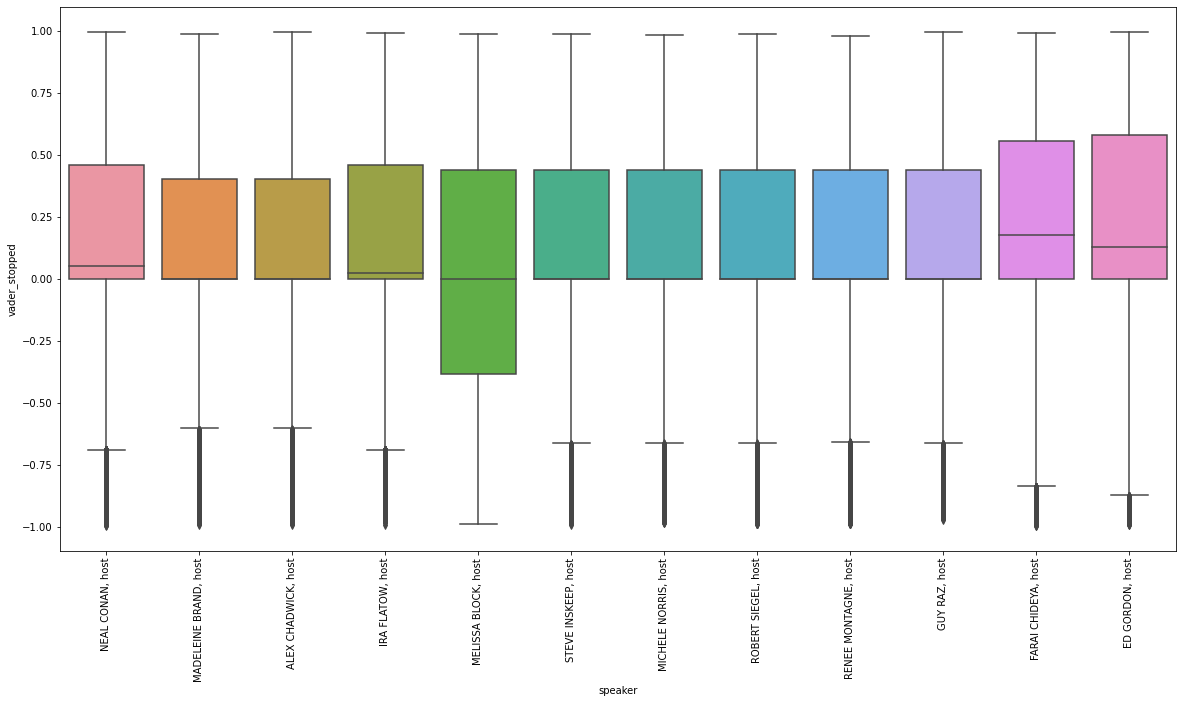

In [67]:
plt.figure(figsize=(20,10))
sns.boxplot(data=top_hosts_df, x='speaker',y='vader_stopped')
plt.xticks(rotation=90);

- The mean sentiment value is awfully close for everyone here, so i'm going to stats test it with an ANOVA test

In [68]:
null_hypothesis = "Average sentiment score is the same across hosts"
alternative_hypothesis = "Average sentiment score is different from one host to the next"
alpha = 0.01 # Let's be 99% certain the result we see isn't due to chance/randomness

In [102]:
host_df_list=[]
for host in hosts_with_the_most:
    x = host.split()
    host_df_list.append(f'{x[0]}_df')
print(host_df_list)

['NEAL_df', 'IRA_df', 'FARAI_df', 'MADELEINE_df', 'ROBERT_df', 'STEVE_df', 'ALEX_df', 'MELISSA_df', 'RENEE_df', 'GUY_df', 'ED_df', 'MICHELE_df']


In [109]:
# Let's isolate our hosts
NEAL_df = df[df.speaker == 'NEAL CONAN, host'].vader_stopped
IRA_df = df[df.speaker == 'IRA FLATOW, host'].vader_stopped
FARAI_df = df[df.speaker == 'FARAI CHIDEYA, host'].vader_stopped
MADELEINE_df = df[df.speaker == 'MADELEINE BRAND, host'].vader_stopped
ROBERT_df = df[df.speaker == 'ROBERT SIEGEL, host'].vader_stopped
STEVE_df = df[df.speaker == 'STEVE INSKEEP, host'].vader_stopped
ALEX_df = df[df.speaker == 'ALEX CHADWICK, host'].vader_stopped
MELISSA_df = df[df.speaker == 'MELISSA BLOCK, host'].vader_stopped
RENEE_df = df[df.speaker == 'RENEE MONTAGNE, host'].vader_stopped
GUY_df = df[df.speaker == 'GUY RAZ, host'].vader_stopped
ED_df = df[df.speaker == 'ED GORDON, host'].vader_stopped
MICHELE_df = df[df.speaker == 'MICHELE NORRIS, host'].vader_stopped

In [110]:
# f_oneway is our ANOVA test
# See https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.f_oneway.html for more info
from scipy.stats import f_oneway

f, p = f_oneway(NEAL_df, IRA_df, FARAI_df, MADELEINE_df, ROBERT_df, STEVE_df, ALEX_df, MELISSA_df, RENEE_df, GUY_df, ED_df, MICHELE_df)
p

0.0

In [112]:
if p < alpha:
    print("We reject the null hypothesis that", null_hypothesis)
    print("We move forward with the alternative hypothesis that", alternative_hypothesis)
else:
    print("We fail to reject the null hypothesis")
    print("Evidence does not support the claim that sentiment differs from host to host")

We reject the null hypothesis that Average sentiment score is the same across hosts
We move forward with the alternative hypothesis that Average sentiment score is different from one host to the next


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
 [Text(0, 0, 'NEAL CONAN, host'),
  Text(1, 0, 'MADELEINE BRAND, host'),
  Text(2, 0, 'ALEX CHADWICK, host'),
  Text(3, 0, 'IRA FLATOW, host'),
  Text(4, 0, 'MELISSA BLOCK, host'),
  Text(5, 0, 'STEVE INSKEEP, host'),
  Text(6, 0, 'MICHELE NORRIS, host'),
  Text(7, 0, 'ROBERT SIEGEL, host'),
  Text(8, 0, 'RENEE MONTAGNE, host'),
  Text(9, 0, 'GUY RAZ, host'),
  Text(10, 0, 'FARAI CHIDEYA, host'),
  Text(11, 0, 'ED GORDON, host')])

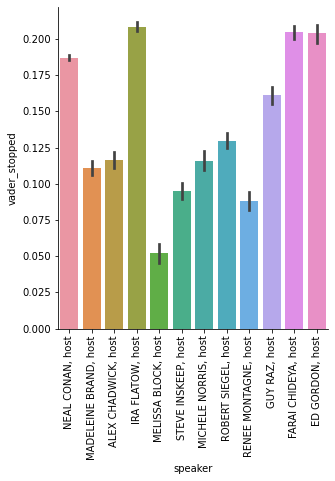

In [114]:
sns.catplot(x="speaker", y="vader_stopped", kind="bar", data=top_hosts_df)
plt.xticks(rotation=90)

- Another view of the same...it looks more clear here that there is a difference, however note the small scale on the y axis